## 0.0) Importando Bibliotecas

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!{sys.executable} -m pip install chardet
import chardet

In [31]:
pd.options.display.float_format = '{:.2f}'.format

## 0.1) Carregando os Dados

Carregando dataset de imóveis

In [2]:
df_imoveis = pd.read_csv('./dados/dados_imoveis.csv')
df_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Carregando dataset do IBGE

In [3]:
# Olhar os 10000 primeiros bytes do arquivo para deduzir o enconding dos caracteres
# para então importar corretamente os dados em um Pandas Dataframe
with open("./dados/basico_sp1.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [4]:
# Importando a base de dados do IBGE
df_ibge = pd.read_csv( './dados/basico_sp1.csv', sep=";", encoding='utf-8', thousands=".", decimal=",", engine="python" )
df_ibge.dropna(how='all', axis=1, inplace=True)
df_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


# 1) Descrição dos Dados

In [5]:
df_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [6]:
df_imoveis.shape

(10008, 8)

In [7]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


### Valores Nulos

In [8]:
df_imoveis.isna().sum()

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

As variáveis `Rua` e `Bairro` possuem valores nulos que precisam ser tratados posteriormente.

### Tipos dos dados

In [9]:
df_imoveis.dtypes

Rua          object
Bairro       object
Cidade       object
Metragem      int64
Quartos       int64
Banheiros     int64
Vagas         int64
Valor        object
dtype: object

O tipo da coluna `Valor` está errado, devendo ser transformada para numérica de ponto flutuante.

In [10]:
df_imoveis['Valor'].sample(10)

1497    R$ 14.000\n                      /Mês
392                                R$ 890.000
2127                             R$ 2.000.000
2500                            R$ 22.000.000
2544                             R$ 1.680.000
2531                             R$ 2.050.000
7434                             R$ 4.800.000
1631                             R$ 1.950.000
9987                               R$ 850.001
9890                             R$ 3.500.001
Name: Valor, dtype: object

### Resolvendo Tipos de Dados Incorretos

**Variável `Valor`**

Aluguel Diário

In [11]:
df_imoveis[df_imoveis['Valor'].str.contains('Dia')]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6639,NaN,Jardim Guedala,São Paulo,572,4,6,7,R$ 15.000\n /Dia
7421,NaN,Jardim Guedala,São Paulo,577,4,6,7,R$ 15.000\n /Dia


Aluguel Mensal

In [12]:
df_imoveis_alugar = df_imoveis[df_imoveis['Valor'].str.contains('Mês')]
df_imoveis_alugar.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
151,Rua Fonseca da Costa,Bosque da Saúde,São Paulo,650,4,6,12,R$ 11.000\n /Mês
156,NaN,Jardim Paulistano,São Paulo,230,2,3,2,R$ 12.000\n /Mês
175,Rua Maestro Elias Lobo,Jardim Paulista,São Paulo,542,5,8,4,R$ 25.000\n /Mês
178,Rua Guararapes,Lapa,São Paulo,515,3,5,8,R$ 30.000\n /Mês
182,Rua Alvarenga,Butantã,São Paulo,400,4,3,4,R$ 10.000\n /Mês


In [13]:
alugar_prct = df_imoveis_alugar.shape[0] / df_imoveis.shape[0]  * 100
print(f"Porcentagem de imoveis para alugar: {alugar_prct:.2f}%")

Porcentagem de imoveis para alugar: 8.47%


Aluguel Anual

In [14]:
df_imoveis[df_imoveis['Valor'].str.contains('Ano')]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6029,NaN,Instituto de Previdência,São Paulo,120,3,1,2,R$ 2.600\n /Ano
6718,NaN,Instituto de Previdência,São Paulo,125,3,1,2,R$ 2.600\n /Ano


In [15]:
# Deletando os imóveis de aluguel DIÁRIO
df_imoveis.drop(df_imoveis[df_imoveis['Valor'].str.contains('Dia')].index, inplace=True)

# Deletando e salvando os imóveis de aluguel MENSAL
df_imoveis.drop(df_imoveis_alugar.index, inplace=True)
df_imoveis_alugar.to_csv('./dados/dados_imoveis_alugar.csv')

# Deletando os imóveis de aluguel ANUAL
df_imoveis.drop(df_imoveis[df_imoveis['Valor'].str.contains('Ano')].index, inplace=True)

A partir da nossa análise, descobrimos que o dataset de imóveis não somente compreende casas para vender, mas também casas para alugar. Essas casas correspondem a cerca de 8.47% do dataset completo, nossa decisão foi salvar esses dados em um arquivo .csv único, que separa essas casas do restante e nos permite posteriormente realizar análises direcionadas para elas.

**Resolvendo o tipo incorreto**

In [16]:
df_imoveis['Valor'].sample(5)

9573      R$ 799.000
8525      R$ 585.000
7183    R$ 5.000.000
1814    R$ 3.200.000
1459    R$ 4.800.000
Name: Valor, dtype: object

In [25]:
df_imoveis['Valor'] = df_imoveis['Valor']\
    .str.replace('R\$|,', '', regex=True)\
        .str.replace('.', '').str.strip()

/tmp/ipykernel_15840/3104495581.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_imoveis['Valor'] = df_imoveis['Valor']\


In [28]:
df_imoveis['Valor'] = df_imoveis['Valor'].astype(int)
df_imoveis['Valor'].sample(5)

9588    1500000
3776    1800000
7869    1300000
1295    5000000
2121    3500000
Name: Valor, dtype: int64

# Calculando Estatísticas

In [32]:
df_imoveis.describe().rename({'50%': 'Mediana', 'mean': 'Média'}).T

,count,Média,std,min,25%,Mediana,75%,max
Metragem,9156.00,434.42,7856.42,10.00,168.00,276.00,450.00,750000.00
Quartos,9156.00,3.45,1.05,1.00,3.00,3.00,4.00,16.00
Banheiros,9156.00,3.80,1.97,1.00,2.00,4.00,5.00,40.00
Vagas,9156.00,3.96,2.60,1.00,2.00,4.00,5.00,50.00
Valor,9156.00,3052202.96,3944208.19,13000.00,890000.00,1800000.00,3500000.00,65000000.00


# Análise Exploratória dos Dados

## Imprimindo BoxPlots

<AxesSubplot:>

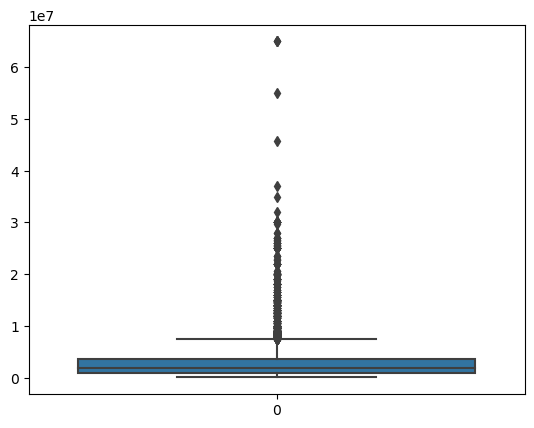

In [29]:
sns.boxplot(df_imoveis['Valor'])

<AxesSubplot:>

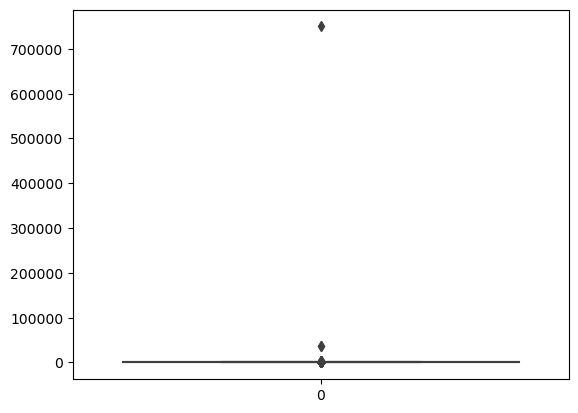

In [20]:
sns.boxplot(df_imoveis['Metragem'])

<AxesSubplot:>

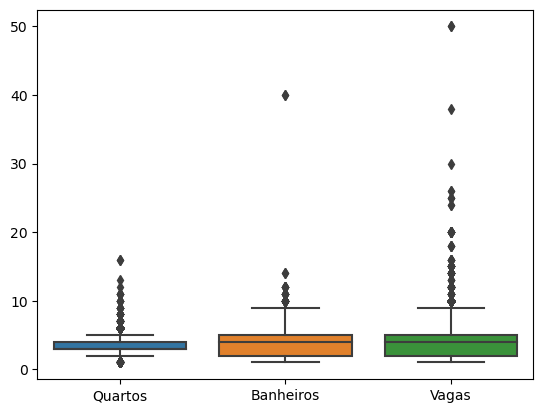

In [21]:
sns.boxplot(df_imoveis.drop(columns=['Metragem']))

<AxesSubplot:>

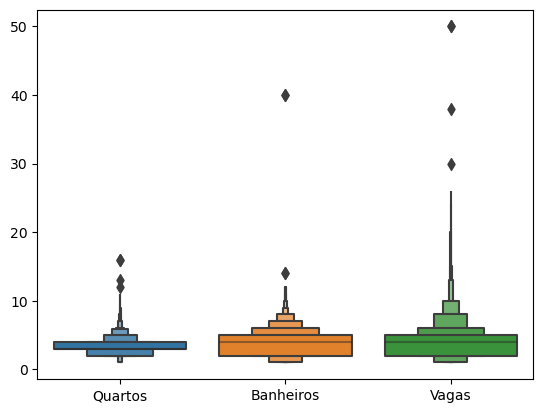

In [22]:
sns.boxenplot(df_imoveis.drop(columns=['Metragem']))

<AxesSubplot:>

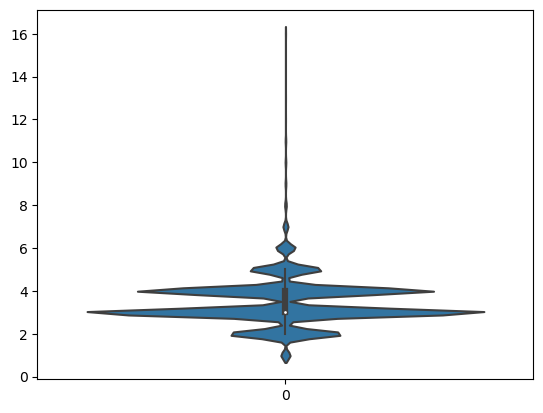

In [23]:
sns.violinplot(df_imoveis['Quartos'])